<a href="https://colab.research.google.com/github/salmanznetwork/Voice-pathology-detection-using-CNN/blob/main/Audio_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip "/content/Dataset.zip"

unzip:  cannot find or open /content/Dataset.zip, /content/Dataset.zip.zip or /content/Dataset.zip.ZIP.


In [ ]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='/content/Dataset/fold1/100-a_n.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)


In [ ]:
print(librosa_audio_data)

[0.09176823 0.13076192 0.09949495 ... 0.24774563 0.26527718 0.        ]


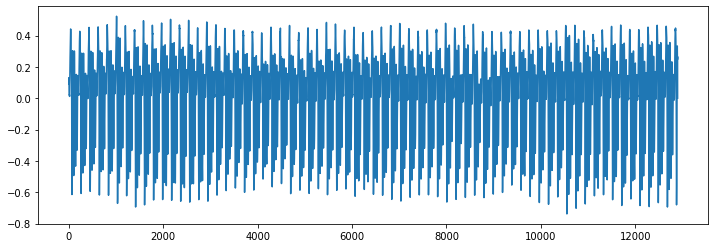

In [ ]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [ ]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [ ]:
wave_audio

array([4288, 4106, 3970, ..., 8405, 8233, 7984], dtype=int16)

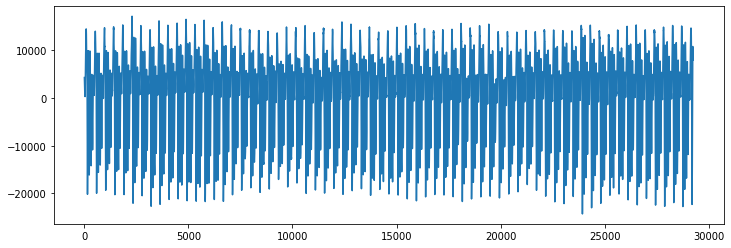

In [ ]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [ ]:
# feature extraction 
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 26)


In [ ]:
mfccs

array([[-123.65532   , -135.04445   , -145.1148    , ..., -168.9702    ,
        -120.85583   ,  -75.139     ],
       [ 207.3537    ,  205.708     ,  198.91504   , ...,  199.44788   ,
         180.48866   ,  162.76291   ],
       [   7.504533  ,   -2.6900892 ,  -18.478638  , ...,  -16.30079   ,
          12.983358  ,   33.584488  ],
       ...,
       [  -3.0323768 ,   -3.814051  ,   -3.232018  , ...,   -0.90966105,
           0.65445465,    0.6105745 ],
       [  -2.0490906 ,   -2.3698149 ,   -0.6358739 , ...,   -1.7039671 ,
           1.4701172 ,    3.279395  ],
       [  -8.166105  ,   -9.070297  ,   -7.3323154 , ...,  -11.066149  ,
          -5.862865  ,   -2.1288078 ]], dtype=float32)

In [ ]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa


In [ ]:
audio_dataset_path='/content/Dataset'
metadata=pd.read_csv('/content/MiniProject_2.csv')
metadata.head(25)

,Name,fold,class
0,4-a_n.wav,1,Healthy
1,5-a_n.wav,1,Healthy
2,9-a_n.wav,1,Healthy
3,11-a_n.wav,1,Healthy
4,15-a_n.wav,1,Healthy
5,29-a_n.wav,1,Healthy
6,40-a_n.wav,1,Healthy
7,43-a_n.wav,1,Healthy
8,53-a_n.wav,1,Healthy
9,59-a_n.wav,1,Healthy


In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [ ]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["Name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

85it [00:02, 31.07it/s]


In [ ]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head(20)

,feature,class
0,"[-270.8694, 197.79108, -33.1016, -14.057686, -...",Healthy
1,"[-164.7773, 166.81873, -68.289764, 2.6959753, ...",Healthy
2,"[-153.99815, 232.11462, -45.288204, -12.702455...",Healthy
3,"[-161.24353, 185.97054, -33.33057, 12.812344, ...",Healthy
4,"[-161.27567, 168.85556, -51.081738, -10.435919...",Healthy
5,"[-183.74129, 171.42766, -28.641682, -6.5223384...",Healthy
6,"[-218.47148, 187.03171, -20.26753, -43.10445, ...",Healthy
7,"[-137.10773, 165.28014, -69.662285, -8.4394865...",Healthy
8,"[-201.7632, 173.31616, -28.38102, -9.669392, -...",Healthy
9,"[-178.5726, 181.9101, -41.68076, 11.288269, -5...",Healthy


In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
print(X)

[[-270.8694     197.79108    -33.1016    ...    4.0665307   -9.259163
    -5.515717 ]
 [-164.7773     166.81873    -68.289764  ...   -6.0525937   -5.7982445
    -4.4547706]
 [-153.99815    232.11462    -45.288204  ...    3.7216756   -2.6822886
    -4.950468 ]
 ...
 [-225.59465    139.2304     -25.717808  ...   -8.154248   -15.837991
   -10.129625 ]
 [-239.60007    144.36246    -32.85028   ...   15.269905    -1.5214477
   -14.7238865]
 [-227.09975    155.03229    -19.819502  ...    0.9819282    3.1352694
     7.7127953]]


In [ ]:
X.shape

(85, 40)

In [ ]:
y

array(['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Unhealthy',
       'Unhealthy', 'Unhealthy', 'Unhealthy', 'Unhealthy', 'Unhealthy',
       'Unhealthy', 'Unhealthy', 'Unhealthy', 'Unhealthy', 'Unhealthy',
       'Unhealthy', 'Unhealthy', 'Unhealthy', 'Unhealthy', 'Unhealthy',
       'Unhealthy', 'Unhealthy', 'Unhealthy', 'Unhealthy', 'Unhealthy',
       'Unhealthy', 'Unhealthy', 'Unhealthy', 'Unhealthy', 'Unhealthy',
       'Unhealthy', 'Unhealthy', 'Unhealthy', 'Unhealthy', 'Unhealthy',
       'Unhealthy', 'Unhealthy', 'Unhealthy', 'Unhealthy', 'Unheal

In [ ]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[-1.76851196e+02,  1.04255203e+02,  1.92985020e+01, ...,
        -3.21565223e+00, -4.14253426e+00, -6.97187805e+00],
       [-1.52133835e+02,  1.18575134e+02,  3.67717094e+01, ...,
        -1.53112948e-01, -2.45668456e-01, -4.14234543e+00],
       [-1.99414597e+02,  1.89455261e+02,  2.00184059e+01, ...,
        -7.17013931e+00, -4.03824234e+00,  1.87181905e-01],
       ...,
       [-2.27980331e+02,  1.57971542e+02,  1.40550537e+01, ...,
        -1.24953675e+00,  1.55083930e+00, -7.72003460e+00],
       [-1.63716965e+02,  1.55836594e+02, -3.75511475e+01, ...,
        -7.80521870e+00, -3.57204437e+00, -6.86248636e+00],
       [-1.56312729e+02,  1.69118103e+02,  2.20575180e+01, ...,
        -4.89099550e+00,  5.06170571e-01, -4.26302290e+00]], dtype=float32)

In [ ]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [ ]:
X_train.shape

(68, 40)

In [ ]:
X_test.shape

(17, 40)

In [ ]:
y_train.shape

(68, 2)

In [ ]:
y_test.shape

(17, 2)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
### No of classes
num_labels=y.shape[1]


In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4100      
                                                                 
 activation_4 (Activation)   (None, 100)               0         
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               20200     
                                                                 
 activation_5 (Activation)   (None, 200)               0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
1/3 [=========>....................] - ETA: 0s - loss: 15.7190 - accuracy: 0.6250
Epoch 1: val_loss improved from inf to 1.33829, saving model to saved_models/audio_classification.hdf5
3/3 [==============================] - 1s 107ms/step - loss: 18.0336 - accuracy: 0.5588 - val_loss: 1.3383 - val_accuracy: 0.6471
Epoch 2/100
1/3 [=========>....................] - ETA: 0s - loss: 23.1263 - accuracy: 0.4688
Epoch 2: val_loss did not improve from 1.33829
3/3 [==============================] - 0s 17ms/step - loss: 20.2412 - accuracy: 0.5588 - val_loss: 3.8400 - val_accuracy: 0.5294
Epoch 3/100
1/3 [=========>....................] - ETA: 0s - loss: 12.7876 - accuracy: 0.5938
Epoch 3: val_loss did not improve from 1.33829
3/3 [==============================] - 0s 15ms/step - loss: 17.1671 - accuracy: 0.5000 - val_loss: 4.6880 - val_accuracy: 0.5294
Epoch 4/100
1/3 [=========>....................] - ETA: 0s - loss: 21.0222 - accuracy: 0.4375
Epoch 4: val_loss did not improve from 

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.6470588445663452


In [ ]:
X_test[1]

array([-194.68253   ,  199.1803    ,  -15.674399  ,  -13.489755  ,
        -40.142532  ,    3.081527  ,  -13.647861  ,    8.873299  ,
         -6.4065375 ,   -8.611849  ,    8.656165  ,   16.507761  ,
         23.364828  ,  -14.350195  ,  -21.96088   ,   14.692191  ,
        -33.375103  ,    1.4047137 ,   10.128197  ,   -3.5165384 ,
        -11.237377  ,    4.5769897 ,   -0.97886395,   -7.033073  ,
         -1.7470907 ,  -10.364466  ,   -1.8816767 ,   -4.174636  ,
         -2.4766483 ,    0.6181434 ,    1.7785631 ,  -19.440752  ,
         -0.4468446 ,   -4.699529  ,   -4.026074  ,   -4.9241095 ,
         -0.7360573 ,   -2.1384578 ,   -5.895418  ,   -6.0557904 ],
      dtype=float32)

In [ ]:
filename="/content/Dataset/fold1/134-a_n.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
predicted_label1=np.argmax(predicted_label)
print(predicted_label1)

if predicted_label1 == 0:
   print("Healthy")
else : 
   print("Unhealthy")



[-221.61746    176.1762     -35.435825     3.7618442  -49.199314
   -2.881082    -5.0344677   13.147966   -12.00974    -15.385911
    1.0386016    7.8678184    6.999666   -16.41233     -5.4959807
    2.5267541  -33.240627     7.7062097    3.8614812   -9.793816
    1.7478343   -3.1325562   -4.176895    -1.3733116   -2.805144
   -1.0803652    4.149738    -7.406294     2.8962033    1.3976752
   -9.649953    -6.1701255   -1.7878238  -11.871547    -2.8532045
   -0.610629    -9.186201     3.0960927  -13.330546     2.7236776]
[[-221.61746    176.1762     -35.435825     3.7618442  -49.199314
    -2.881082    -5.0344677   13.147966   -12.00974    -15.385911
     1.0386016    7.8678184    6.999666   -16.41233     -5.4959807
     2.5267541  -33.240627     7.7062097    3.8614812   -9.793816
     1.7478343   -3.1325562   -4.176895    -1.3733116   -2.805144
    -1.0803652    4.149738    -7.406294     2.8962033    1.3976752
    -9.649953    -6.1701255   -1.7878238  -11.871547    -2.8532045
    -0.610

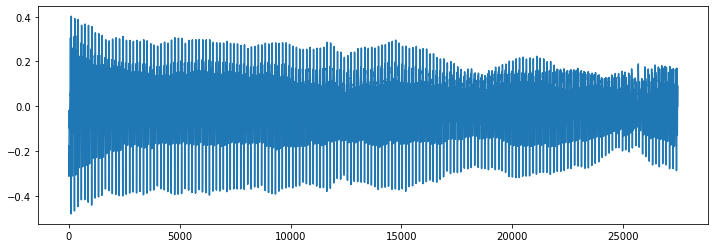

In [ ]:
import librosa
audio_file_path='/content/Dataset/fold1/134-a_n.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [ ]:
filename="/content/Dataset/fold2/107-a_n.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
predicted_label1=np.argmax(predicted_label)
print(predicted_label1)

if predicted_label1 == 0:
   print("Healthy")
else : 
   print("Unhealthy")

[-2.78578644e+02  1.65497360e+02  6.10648108e+00  3.09028327e-01
 -5.15576096e+01 -4.02205887e+01  6.94250536e+00  2.80197067e+01
 -1.55405312e+01 -1.65081620e+00  1.41051073e+01 -1.01359730e+01
 -4.94542551e+00  1.34279842e+01 -1.37645283e+01 -1.44419432e+01
 -1.42682629e+01  5.12220860e+00 -1.99772053e+01  1.77240105e+01
 -3.98100543e+00 -1.97922211e+01  8.87020016e+00 -1.71300583e+01
 -5.61996937e+00  5.25417900e+00 -1.26926661e+01 -1.48130566e-01
 -4.68219757e+00 -1.37809334e+01 -3.79627109e+00  6.75004542e-01
 -1.11770735e+01  1.00257802e+00 -2.87606549e+00 -1.49392967e+01
 -5.61041784e+00 -1.59910190e+00 -9.66835499e+00 -6.90247154e+00]
[[-2.78578644e+02  1.65497360e+02  6.10648108e+00  3.09028327e-01
  -5.15576096e+01 -4.02205887e+01  6.94250536e+00  2.80197067e+01
  -1.55405312e+01 -1.65081620e+00  1.41051073e+01 -1.01359730e+01
  -4.94542551e+00  1.34279842e+01 -1.37645283e+01 -1.44419432e+01
  -1.42682629e+01  5.12220860e+00 -1.99772053e+01  1.77240105e+01
  -3.98100543e+00 -

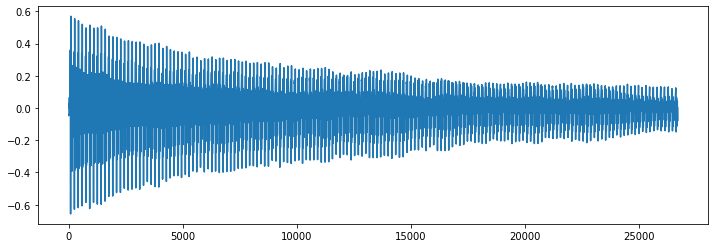

In [ ]:
import librosa
audio_file_path='/content/Dataset/fold2/107-a_n.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)